# Quiz

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: ETL

In [181]:
df = pd.read_csv('data/chocolate_bars.csv')

In [182]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [183]:
df = df.drop(columns = ['manufacturer', 'year_reviewed',
                        'bar_name'])

df.columns

Index(['id', 'company_location', 'bean_origin', 'cocoa_percent',
       'num_ingredients', 'ingredients', 'review', 'rating'],
      dtype='object')

In [184]:
df = df.drop(columns = ['num_ingredients'])

In [185]:
df.columns

Index(['id', 'company_location', 'bean_origin', 'cocoa_percent', 'ingredients',
       'review', 'rating'],
      dtype='object')

In [186]:
df = df.drop(columns = ['company_location'])

In [187]:
df = df.drop(columns = ['id'])

Hypothesis:
    
1. Ingredients and this fake 'review' predicts rating
2. Cocoa_percent, bean_origin may be interesting...

### 2. EDA

Univariate Analysis

In [188]:
df.columns

Index(['bean_origin', 'cocoa_percent', 'ingredients', 'review', 'rating'], dtype='object')

In [189]:
df.dtypes

bean_origin       object
cocoa_percent    float64
ingredients       object
review            object
rating           float64
dtype: object

In [190]:
#so cocoa is continuous, so dist

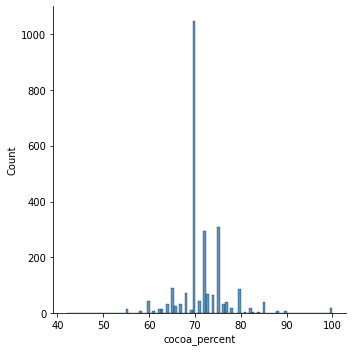

In [191]:
sns.displot(df['cocoa_percent'])

In [192]:
df['cocoa_percent'].describe()

count    2530.000000
mean       71.639723
std         5.616724
min        42.000000
25%        70.000000
50%        70.000000
75%        74.000000
max       100.000000
Name: cocoa_percent, dtype: float64

In [193]:
#i want to check whether cocoa_percent affects the rating
cond0  = df.cocoa_percent <  50
cond1  = df.cocoa_percent >= 50

In [194]:
print(df.loc[cond0, 'rating'].mean())
print(df.loc[cond1, 'rating'].mean())

2.75
3.1966969936708862


In [195]:
df.bean_origin.unique()

array(['Tanzania', 'Dominican Republic', 'Madagascar', 'Fiji',
       'Venezuela', 'Uganda', 'India', 'Bolivia', 'Peru', 'Panama',
       'Colombia', 'Burma', 'Brazil', 'Papua New Guinea', 'Ecuador',
       'Cuba', 'Togo', 'Sao Tome', 'Mexico', 'Vanuatu', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Ghana', 'Belize', 'Blend',
       'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Haiti', 'Congo', 'Philippines', 'Solomon Islands', 'Malaysia',
       'Sri Lanka', 'Ivory Coast', 'Gabon', 'Taiwan', 'Puerto Rico',
       'Martinique', 'St. Lucia', 'Australia', 'Liberia', 'Sierra Leone',
       'U.S.A.', 'Nigeria', 'St.Vincent-Grenadines', 'Thailand', 'Tobago',
       'Sao Tome & Principe', 'Sumatra', 'El Salvador', 'Cameroon',
       'Samoa', 'China', 'Principe', 'Sulawesi', 'Suriname', 'DR Congo'],
      dtype=object)

In [196]:
cond_sa = df.bean_origin.isin(['Dominican Republic', 'Venezuela',
                            'Peru', 'Bolivia',
                            'Colombia'])

df.loc[cond_sa, 'rating'].mean()


3.2103174603174605

In [197]:
cond_sa1 = df.bean_origin == 'Dominican Republic'
cond_sa2 = df.bean_origin == 'Venezuela'
cond_sa3 = df.bean_origin == 'Peru'
cond_sa4 = df.bean_origin == 'Bolivia'
cond_sa5 = df.bean_origin == 'Colombia'
cond_sa6 = df.bean_origin == 'Panama'
cond_sa7 = df.bean_origin == 'Brazil'
cond_sa8 = df.bean_origin == 'Ecuado'
cond_sa9 = df.bean_origin == 'Mexico'
cond_sa10 = df.bean_origin == 'Nicaragua'
cond_sa11 = df.bean_origin == 'Honduras'

cond_sa = cond_sa1 | cond_sa2 | cond_sa3 | cond_sa4 | cond_sa5 | cond_sa6 | cond_sa7 | cond_sa8 | cond_sa9 | cond_sa10

df.loc[cond_sa, 'rating'].mean()


3.2150800711743774

In [198]:
cond_not_sa = ~cond_sa1 & ~cond_sa2 & ~cond_sa3 & ~cond_sa4 & ~cond_sa5 & ~cond_sa6 & ~cond_sa7 & ~cond_sa8 & ~cond_sa9 & ~cond_sa10 & ~cond_sa11

In [199]:
df.loc[cond_not_sa, 'rating'].mean()

3.1803041274438812

In [200]:
#So far....
# cocoa_percent NO
# bean origin   NO

df.columns

Index(['bean_origin', 'cocoa_percent', 'ingredients', 'review', 'rating'], dtype='object')

In [201]:
df.ingredients.unique()

array(['B,S,C', 'B,S,C,L', 'B,S', 'B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
       'B,S,C,V,Sa', nan, 'B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L',
       'B,S,V', 'B,S*,C,L', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa',
       'B,S*,V,L', 'B,C', 'B,S*,C,V', 'B,S,C,L,Sa'], dtype=object)

In [202]:
'''
B = Beans, S = Sugar, S* = Sweetener other than white cane or 
beet sugar, 
C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt
'''

'\nB = Beans, S = Sugar, S* = Sweetener other than white cane or \nbeet sugar, \nC = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt\n'

In [203]:
#convert this to columns....
#B, S, C, L, V, Sa, S* 
#0 or 1
#can you teach us how to use explode()

In [204]:
df['B']  = 0
df['S']  = 0
df['C']  = 0
df['L']  = 0
df['V']  = 0
df['Sa'] = 0
df['S*'] = 0

In [205]:
for index, row in enumerate(df.ingredients):
    try:
        some_list = row.split(',')
    except:
        some_list = []
    for col in ['B', 'S', 'C', 'L', 'V', 'Sa', 'S*']:
        if col in some_list:
            df.loc[index, col] = 1
    

In [206]:
df.drop(columns = ['ingredients'])

,bean_origin,cocoa_percent,review,rating,B,S,C,L,V,Sa,S*
0,Tanzania,76.0,"rich cocoa, fatty, bready",3.25,1,1,1,0,0,0,0
1,Dominican Republic,76.0,"cocoa, vegetal, savory",3.50,1,1,1,0,0,0,0
2,Madagascar,76.0,"cocoa, blackberry, full body",3.75,1,1,1,0,0,0,0
3,Fiji,68.0,"chewy, off, rubbery",3.00,1,1,1,0,0,0,0
4,Venezuela,72.0,"fatty, earthy, moss, nutty,chalky",3.00,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2525,Blend,80.0,"waxy, cloying, vegetal",2.75,1,0,1,0,0,1,1
2526,Colombia,75.0,"strong nutty, marshmallow",3.75,1,1,1,0,0,0,0
2527,Blend,75.0,"fatty, earthy, cocoa",3.00,1,1,1,0,0,0,0
2528,Congo,70.0,"fatty, mild nuts, mild fruit",3.25,1,1,1,0,0,0,0


In [207]:
for each_element in ['B', 'S', 'C', 'L', 'V', 'Sa', 'S*']:
    temp_cond = df[each_element] == 1
    print(f"{each_element}: {df.loc[temp_cond, 'rating'].mean()}")    

B: 3.2100900532132624
S: 3.2176906779661016
C: 3.2114808153477217
L: 3.150608519269777
V: 3.03328611898017
Sa: 3.027027027027027
S*: 2.9967105263157894


### Machine learning

In [208]:
X = df[ ['B', 'S*'] ]
y = df['rating']

In [212]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 999
)

#standardize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

#cross validation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
rr = RandomForestRegressor()
svr = SVR()

models = [lr, rr, svr]

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=5, 
                            scoring='neg_mean_squared_error')
    print(score.mean())


-0.19047893134948582
-0.19057395188039833
-0.20239703816292232


In [221]:
#grid search

from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False]
}

grid = GridSearchCV(lr, param_grid, cv=5, refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [222]:
#predict
yhat = grid.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mean_squared_error(y_test, yhat), r2_score(y_test, yhat)

(0.19910146180111118, 0.023262155910883875)

In [225]:
y_test.mean()

3.173254281949934